## Intelli Cart Recommendor System Product Prototype

First we import the libraries we are going to use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

First dataset we read in is the customer preferances data, taken from kaggle which will help in segmentation of the consumers and thus creating a basic recommendor system for our Intelli-Cart app

In [2]:
#df1 = customer preferances
df1 = pd.read_csv('shopping_trends_updated.csv')

We check the data

In [3]:
df1.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Hence there are 3900 rows of data, with 18 unique columns that we will later see which will qualify as our feeatures and labels

In [5]:
df1.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# EDA and Feature Engineering

Firstly we check for any missing values in the data

In [6]:
df1.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
df1.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Now starting to deep dive into the data, we shall explore some features using data exploration

Firstly we try to visualize the distribution of all the numerical values in the dataset to get an idea of the stats we are dealing with here.

In [8]:
df1 = df1.drop('Customer ID',axis=1)

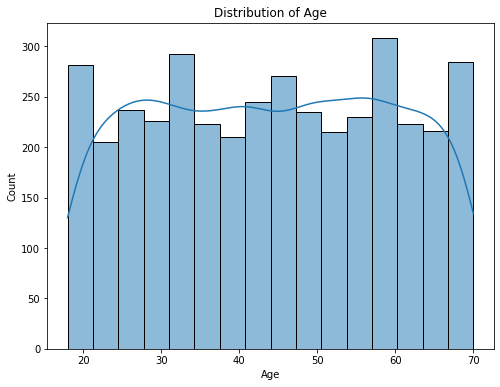

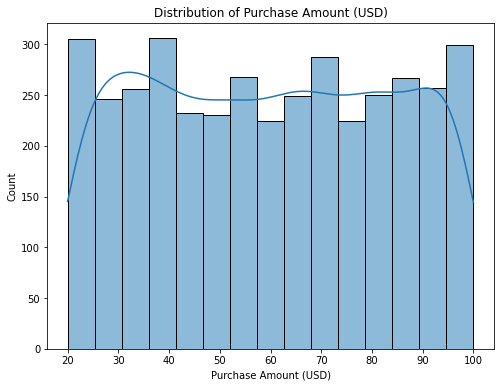

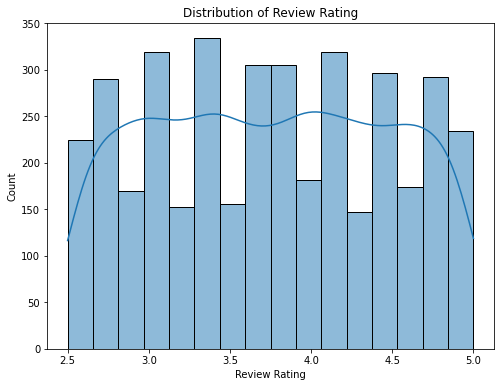

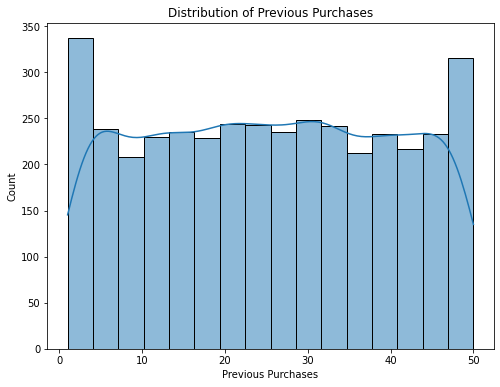

In [9]:
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df1[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Hence we notice that the distribution of all the numerical features are almost equally distributed, with some variations seen which are obvious

Next we see the correlation heatmap for these numerical features

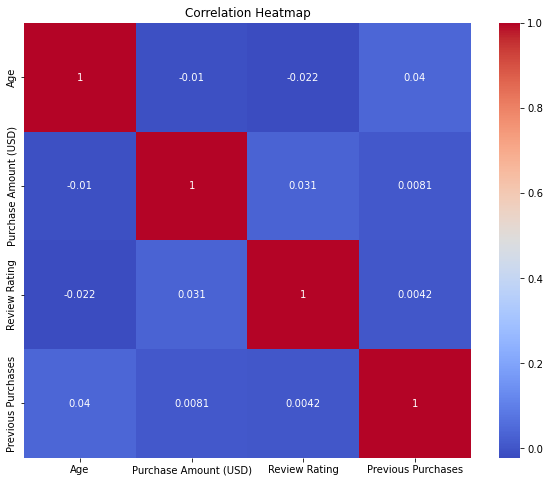

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Count plots for categorical features

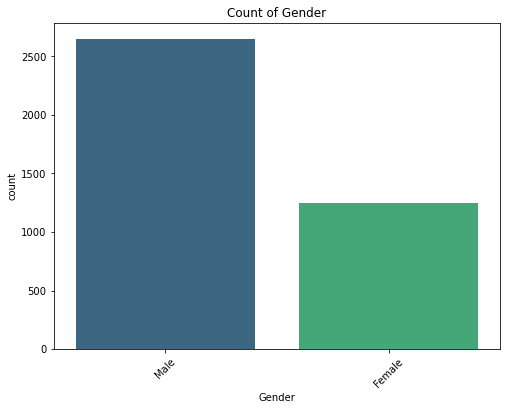

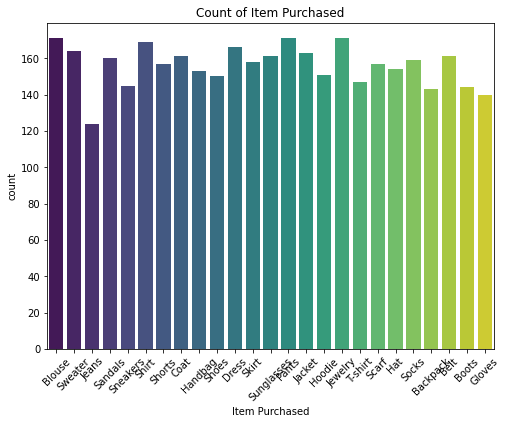

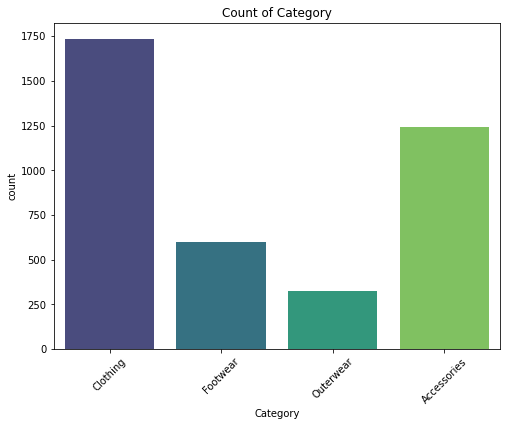

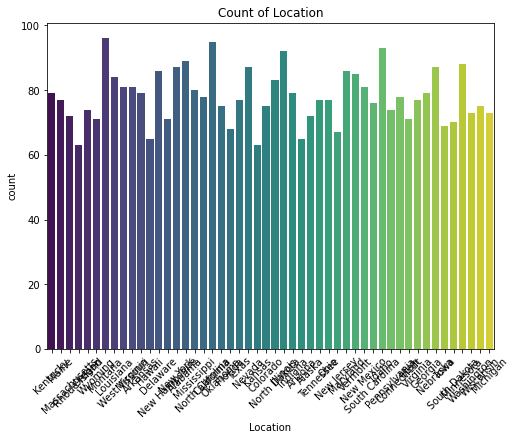

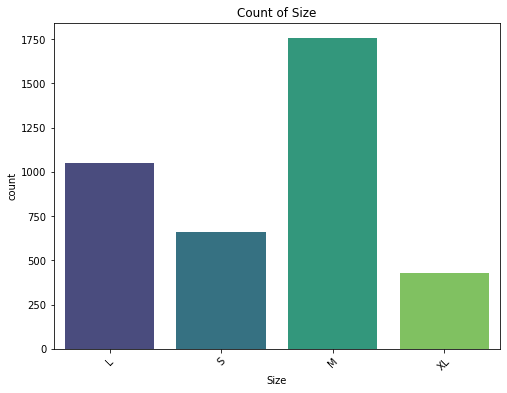

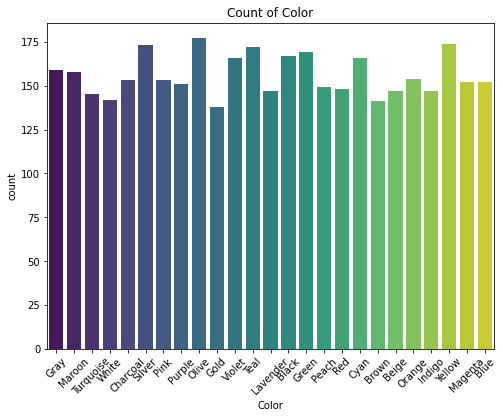

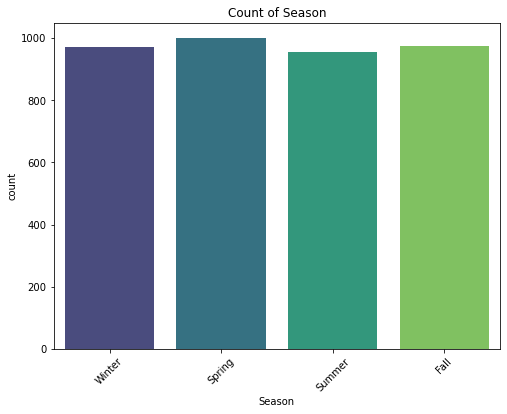

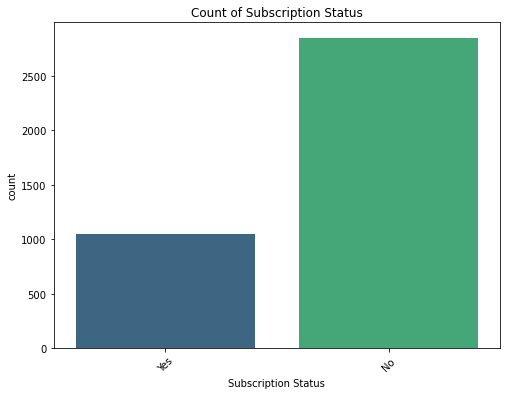

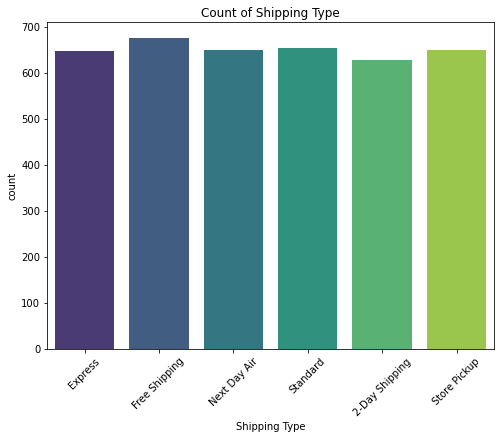

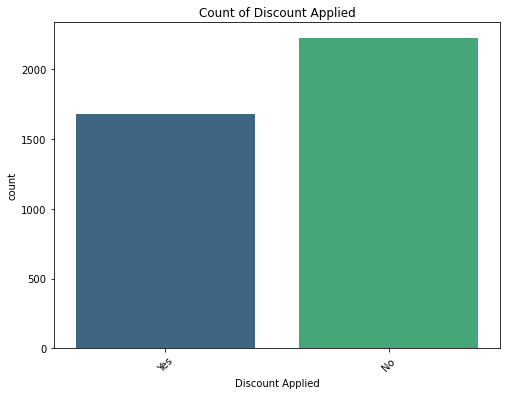

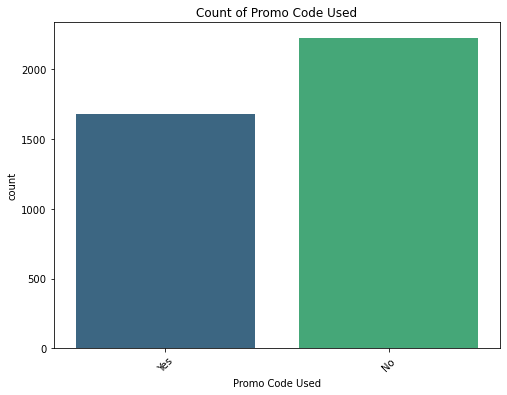

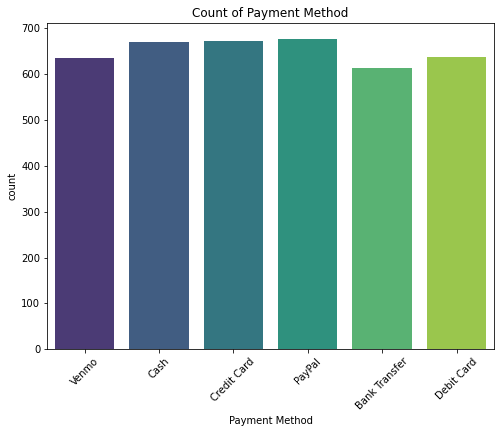

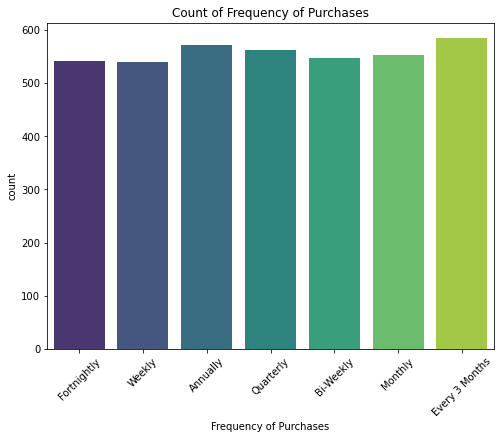

In [11]:
categorical_cols = df1.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df1, x=col, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

Here we can see that in some features like Gender, Category, Size, and Subscription Status there is a good amount of variation among the entities, which can be taken as a basis of consideration later in the analysis to classify the customers and choose which items are more suitable for what type of customers

From the above analysis, we can concur that the likely target variables for our recommendor system can be taken as **'Purchase Amount' and 'Item Purchased' or 'Category'**

For some further analysis, we see the boxplots for Numeric Features and Categorical Features against our target label Purchase Amount

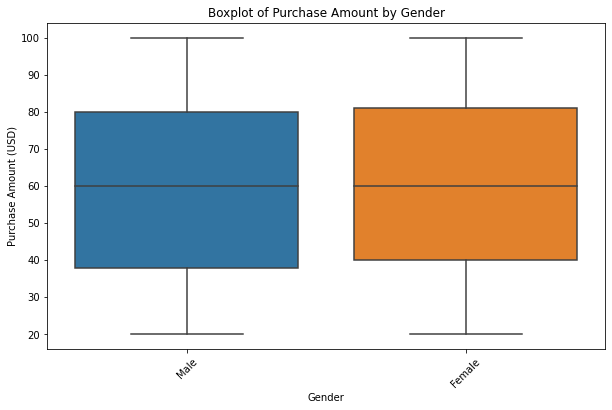

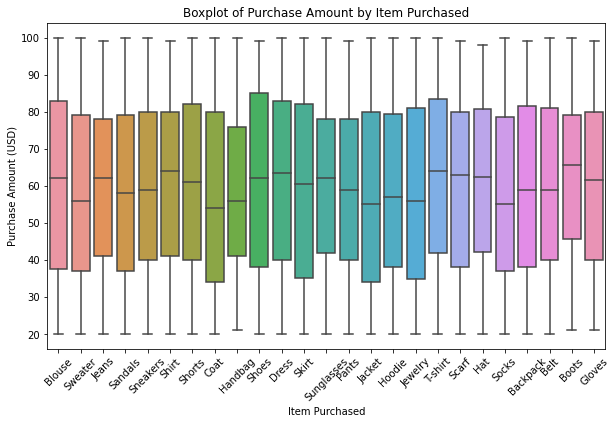

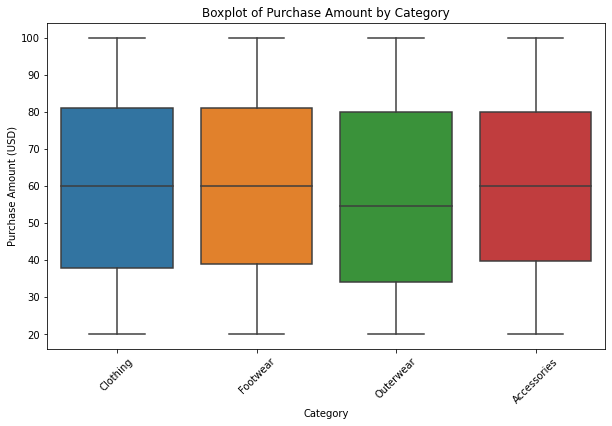

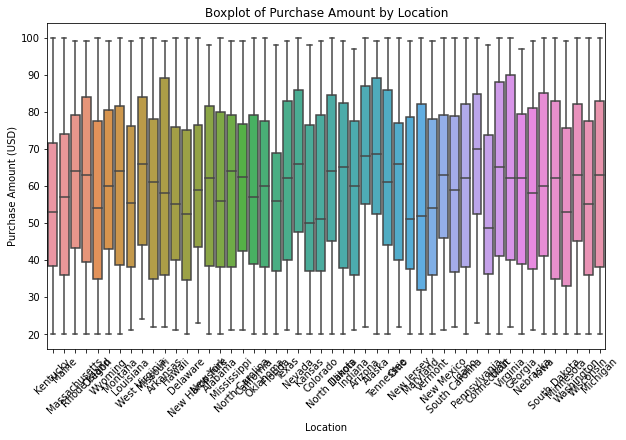

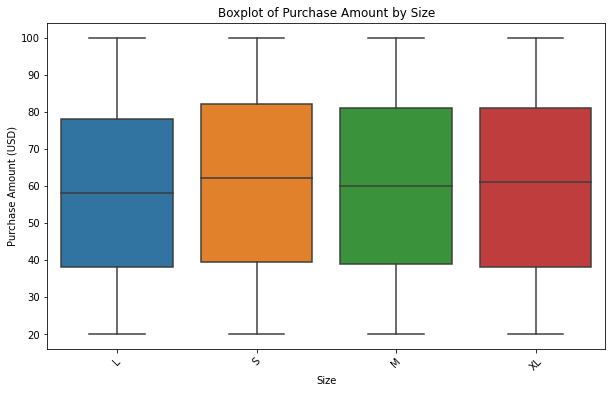

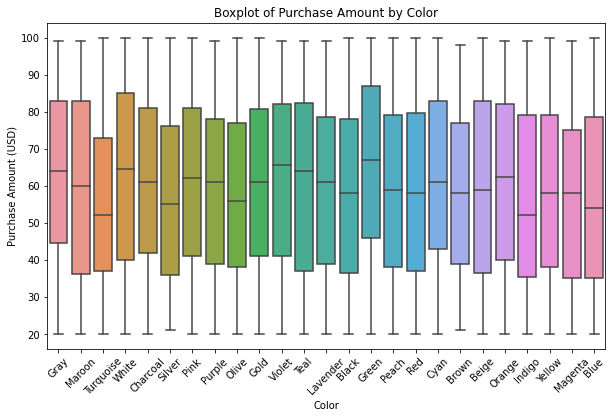

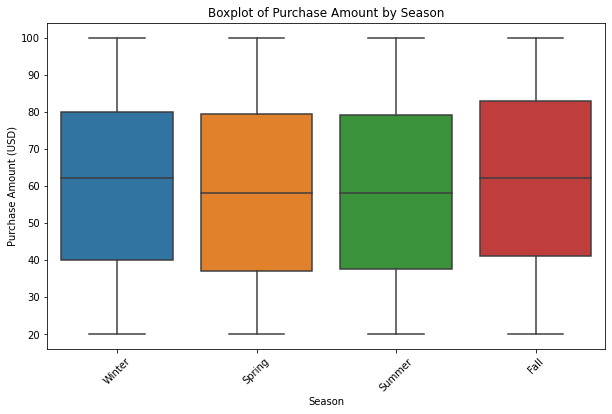

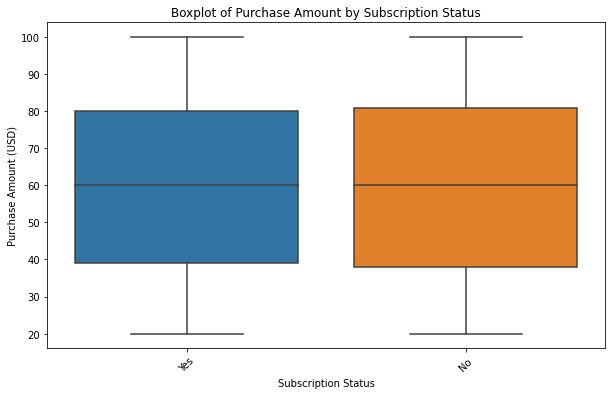

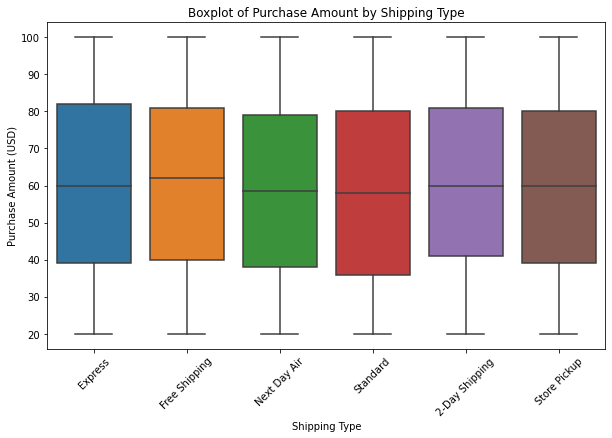

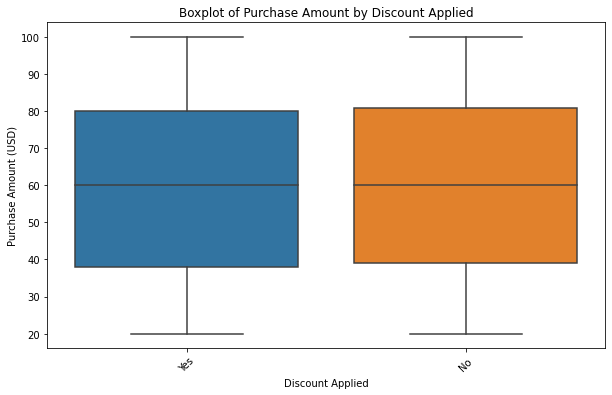

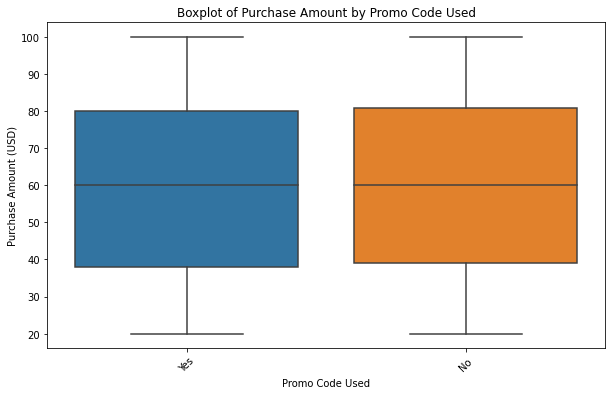

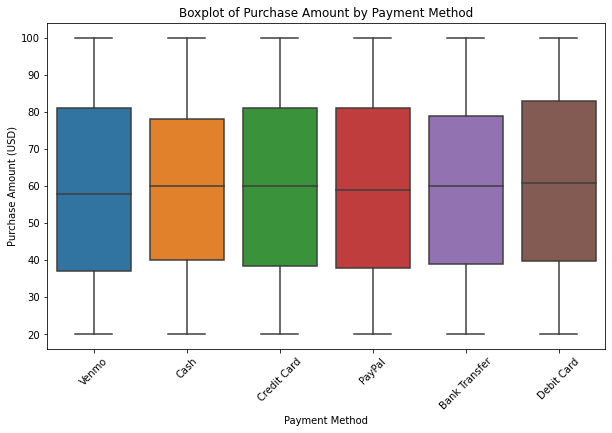

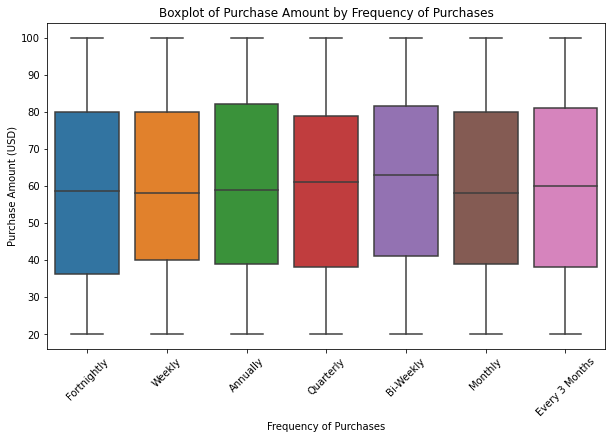

In [12]:
for col in categorical_cols:
    if col != 'Purchase Amount (USD)':  # Exclude the target variable
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df1, x=col, y='Purchase Amount (USD)')
        plt.title(f'Boxplot of Purchase Amount by {col}')
        plt.xticks(rotation=45)
        plt.show()

In [13]:
df1.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


We create binary flags for the Discount applied and Promo code applied columns to analyse them better

In [14]:
df1['Discount_Applied_Flag'] = df1['Discount Applied'].map({'Yes': 1, 'No': 0})
df1['Promo_Code_Used_Flag'] = df1['Promo Code Used'].map({'Yes': 1, 'No': 0})

In [15]:
df1 = df1.drop(['Discount Applied','Promo Code Used'], axis=1)

As there are a lot of Age values, it would be better to club some up in young, middle-aged, senior etc

In [16]:
bins = [0, 25, 40, 60, df1['Age'].max()]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']
df1['Age_Group'] = pd.cut(df1['Age'], bins=bins, labels=labels)

We convert 'Gender' column to numerical values

In [17]:
df1['Male'] = df1['Gender'].map({'Male': 1, 'Female': 0})

In [18]:
df1 = df1.drop('Gender', axis=1)

In [19]:
df1['Subscription Status'] = df1['Subscription Status'].map({'Yes': 1, 'No': 0})

# Customer Segmentation

Now we will utilize clustering algorithms like K-means, GMM etc to segment customers based on their purchase history and behavior, and identify groups of customers with similar preferences and habits.

For customer segmentation various clustering algorithms can be employed. K-means, Hierarchical Clustering, and Gaussian Mixture Models (GMM) are common choices for customer segmentation and thus we will use them and then evaluate their performance

First we get dummy variables for some of the requied categorical features so that they can be used in the models as well

The target label can be selected as the **'Purchase Amount (USD)'** as our main concern is to increase and improve the retail businesses

In [20]:
df1.describe()

,Age,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Discount_Applied_Flag,Promo_Code_Used_Flag,Male
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,0.270000,25.351538,0.430000,0.430000,0.680000
std,15.207589,23.685392,0.716223,0.444016,14.447125,0.495139,0.495139,0.466536
min,18.000000,20.000000,2.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,31.000000,39.000000,3.100000,0.000000,13.000000,0.000000,0.000000,0.000000
50%,44.000000,60.000000,3.700000,0.000000,25.000000,0.000000,0.000000,1.000000
75%,57.000000,81.000000,4.400000,1.000000,38.000000,1.000000,1.000000,1.000000
max,70.000000,100.000000,5.000000,1.000000,50.000000,1.000000,1.000000,1.000000


# K-Means CLustering

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [22]:
segmentation_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Subscription Status', 'Discount_Applied_Flag', 'Promo_Code_Used_Flag', 'Male']
df = df1[segmentation_cols]

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)
df['KMeans_Cluster'] = kmeans.labels_

C:\Users\omkap\AppData\Local\Temp\ipykernel_10364\1507062803.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KMeans_Cluster'] = kmeans.labels_


To get the optimum value of k, we use the elbow method and also plot the silhouette scores

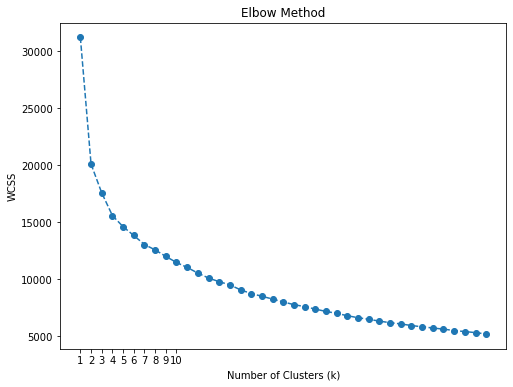

In [24]:
wcss = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # Inertia: within-cluster sum of squares

plt.figure(figsize=(8, 6))
plt.plot(range(1, 40), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()


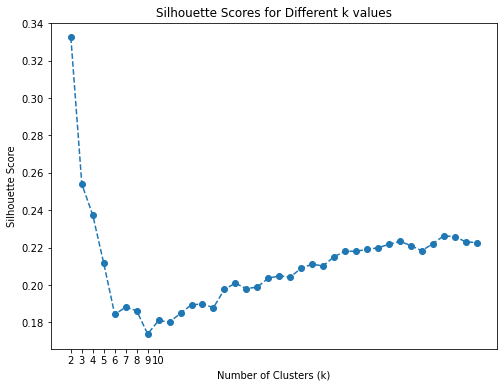

In [25]:
silhouette_scores = []
for i in range(2, 40):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 40), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different k values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()

Highest silhouette score is for k = 2, so we choose 2 clusters to move on with and recalculate the clusters

In [26]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)
df['KMeans_Cluster'] = kmeans.labels_

C:\Users\omkap\AppData\Local\Temp\ipykernel_10364\1067793780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KMeans_Cluster'] = kmeans.labels_


In [27]:
df1['Cluster'] = kmeans.labels_

In [28]:
df.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Subscription Status,Discount_Applied_Flag,Promo_Code_Used_Flag,Male,KMeans_Cluster
0,55,53,3.1,14,1,1,1,1,1
1,19,64,3.1,2,1,1,1,1,1
2,50,73,3.1,23,1,1,1,1,1
3,21,90,3.5,49,1,1,1,1,1
4,45,49,2.7,31,1,1,1,1,1


C:\Users\omkap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KMeans_Cluster', ylabel='count'>

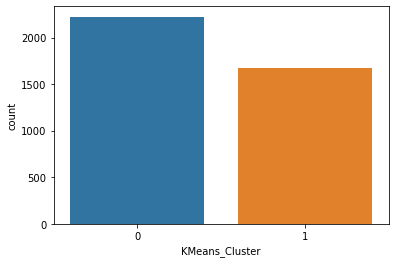

In [29]:
sns.countplot(df['KMeans_Cluster'])

To visualize these clusters, we make a scatter plot for 2 principal components

In [30]:
from sklearn.decomposition import PCA

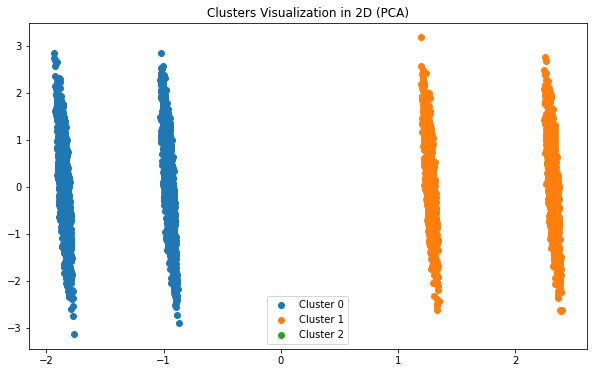

In [31]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
for i in range(3):
    cluster_data = principal_components[df['KMeans_Cluster'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')

plt.title('Clusters Visualization in 2D (PCA)')
plt.legend()
plt.show()

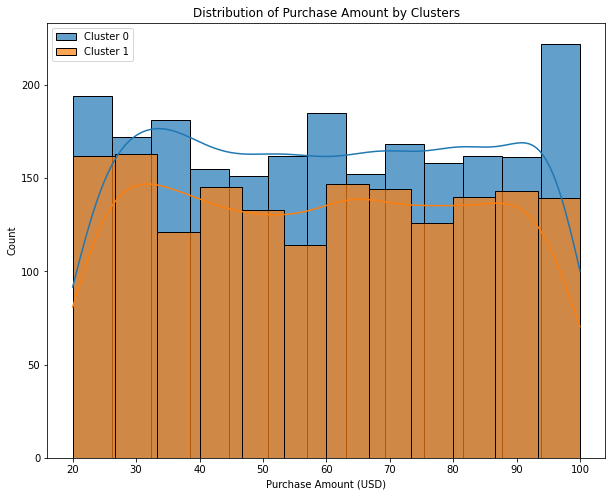

In [32]:
plt.figure(figsize=(10, 8))
for i in range(3):
    cluster_data = df[df['KMeans_Cluster'] == i]['Purchase Amount (USD)']
    sns.histplot(cluster_data, kde=True, label=f'Cluster {i}', color=f'C{i}', alpha=0.7)

plt.title('Distribution of Purchase Amount by Clusters')
plt.legend()
plt.show()

## Hierarchical Clustering (Agglomerative Clustering)

In [33]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [34]:
agglomerative = AgglomerativeClustering(n_clusters=2)
agglomerative.fit(scaled_data)
df['Hierarchical_Cluster'] = agglomerative.labels_

C:\Users\omkap\AppData\Local\Temp\ipykernel_10364\1020049686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hierarchical_Cluster'] = agglomerative.labels_


In [35]:
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_score(scaled_data, agglomerative.labels_)}")

Silhouette Score for Hierarchical Clustering: 0.3323866936651969


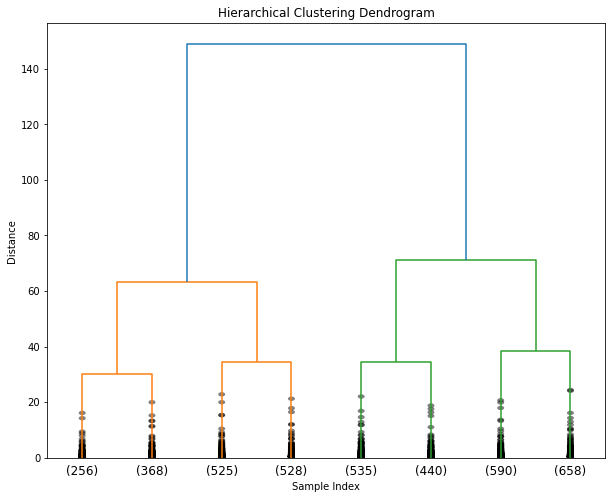

In [36]:
linked = linkage(scaled_data, 'ward')  # 'ward' linkage method is used
plt.figure(figsize=(10, 8))
dendrogram(linked, truncate_mode='level', p=2, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

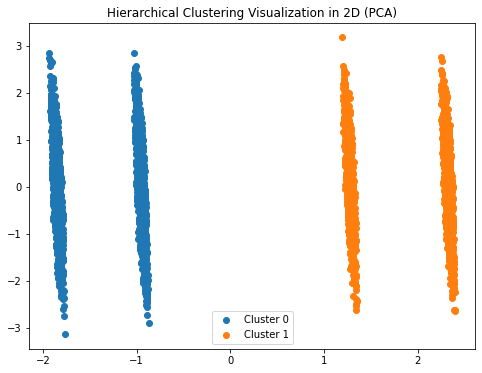

In [37]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
for i in range(2):
    cluster_data = principal_components[df['Hierarchical_Cluster'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')

plt.title('Hierarchical Clustering Visualization in 2D (PCA)')
plt.legend()
plt.show()

# Gaussian Mixture Models (GMM)

In [38]:
from sklearn.mixture import GaussianMixture

In [39]:
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(scaled_data)
df['GMM_Cluster'] = gmm.predict(scaled_data)

C:\Users\omkap\AppData\Local\Temp\ipykernel_10364\1460836853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GMM_Cluster'] = gmm.predict(scaled_data)


In [40]:
print(f"Silhouette Score for GMM: {silhouette_score(scaled_data, gmm.predict(scaled_data))}")

Silhouette Score for GMM: 0.3323866936651969


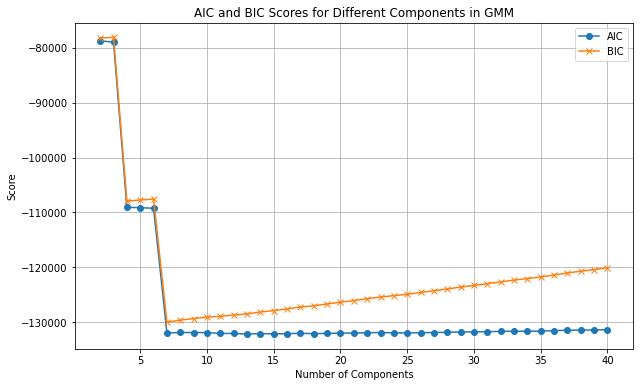

In [41]:

min_components = 2
max_components = 40  # Change this as needed
n_components_range = range(min_components, max_components + 1)

aic_scores = []
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(scaled_data)
    
    aic_scores.append(gmm.aic(scaled_data))
    bic_scores.append(gmm.bic(scaled_data))

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.plot(n_components_range, bic_scores, label='BIC', marker='x')
plt.title('AIC and BIC Scores for Different Components in GMM')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

From the GMM algithm as well we get the optimum value of number of components as 7

In [42]:
gmm = GaussianMixture(n_components=7, random_state=42)
gmm.fit(scaled_data)
df['GMM_Cluster'] = gmm.predict(scaled_data)
df1['GMM_Cluster'] = gmm.predict(scaled_data)

C:\Users\omkap\AppData\Local\Temp\ipykernel_10364\4050465691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GMM_Cluster'] = gmm.predict(scaled_data)


In [43]:
df1.head()

,Age,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Previous Purchases,Payment Method,Frequency of Purchases,Discount_Applied_Flag,Promo_Code_Used_Flag,Age_Group,Male,Cluster,GMM_Cluster
0,55,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Express,14,Venmo,Fortnightly,1,1,Middle-aged,1,1,2
1,19,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Express,2,Cash,Fortnightly,1,1,Young,1,1,2
2,50,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,23,Credit Card,Weekly,1,1,Middle-aged,1,1,2
3,21,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,49,PayPal,Weekly,1,1,Young,1,1,2
4,45,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,31,PayPal,Annually,1,1,Middle-aged,1,1,2


In [44]:
print(df1.groupby('GMM_Cluster').agg(lambda x: x.mode().iloc[0]))

             Age Item Purchased  Category  Purchase Amount (USD)  Location  \
GMM_Cluster                                                                  
0             46        Sandals  Clothing                     32     Idaho   
1             68           Belt  Clothing                     23   Indiana   
2             64          Dress  Clothing                     45    Nevada   
3             41          Skirt  Clothing                     98   Vermont   
4             57          Socks  Clothing                     97  New York   
5             28         Blouse  Clothing                     82    Alaska   
6             43           Coat  Clothing                     94  Delaware   

            Size   Color  Season  Review Rating  Subscription Status  \
GMM_Cluster                                                            
0              M   Olive    Fall            4.0                    0   
1              M   Black  Spring            4.0                    0   
2        

As we can see no need for 7 clusters

In [45]:
print(df1.groupby('Cluster').agg(lambda x: x.mode().iloc[0]))

         Age Item Purchased  Category  Purchase Amount (USD) Location Size  \
Cluster                                                                      
0         57         Blouse  Clothing                     82  Montana    M   
1         54          Pants  Clothing                     90  Indiana    M   

         Color  Season  Review Rating  Subscription Status  Shipping Type  \
Cluster                                                                     
0        Green    Fall            3.4                    0  Free Shipping   
1        Olive  Spring            3.0                    1   Next Day Air   

         Previous Purchases Payment Method Frequency of Purchases  \
Cluster                                                             
0                        31         PayPal               Annually   
1                        21     Debit Card         Every 3 Months   

         Discount_Applied_Flag  Promo_Code_Used_Flag    Age_Group  Male  \
Cluster                   

In [46]:
numerical_columns = df1.select_dtypes(include=np.number).columns.tolist()
categorical_columns = [col for col in df1.columns if col not in numerical_columns]

cluster_means = df1.groupby('Cluster').agg(
    {col: 'mean' for col in numerical_columns}
)
for col in categorical_columns:
    cluster_means[col] = df1.groupby('Cluster')[col].agg(lambda x: x.mode().iloc[0])

print("Mean and mode values per cluster for all columns:")
print(cluster_means)


Mean and mode values per cluster for all columns:
               Age  Purchase Amount (USD)  Review Rating  Subscription Status  \
Cluster                                                                         
0        44.010796              60.130454       3.757715             0.000000   
1        44.144902              59.279070       3.739654             0.627907   

         Previous Purchases  Discount_Applied_Flag  Promo_Code_Used_Flag  \
Cluster                                                                    
0                 25.056230                    0.0                   0.0   
1                 25.742993                    1.0                   1.0   

             Male  Cluster  GMM_Cluster Item Purchased  Category Location  \
Cluster                                                                     
0        0.438596      0.0     2.949168         Blouse  Clothing  Montana   
1        1.000000      1.0     2.803816          Pants  Clothing  Indiana   

        Siz

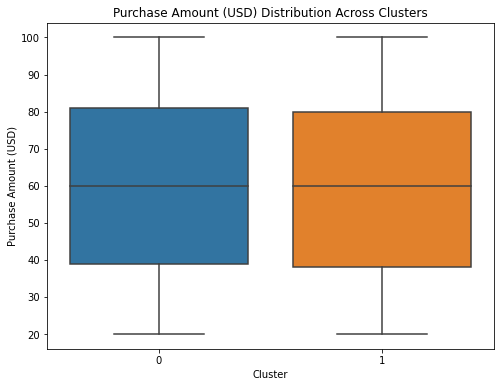

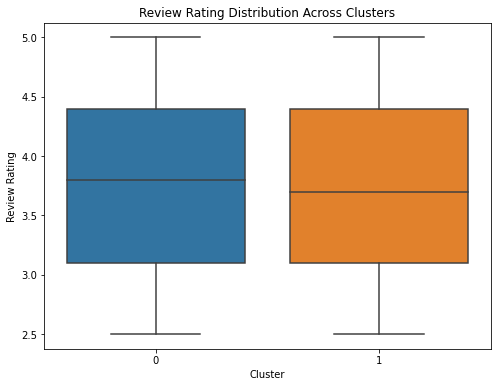

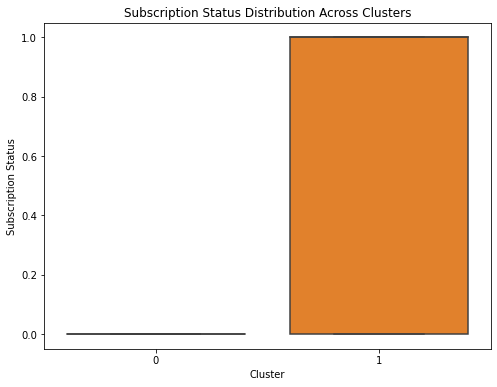

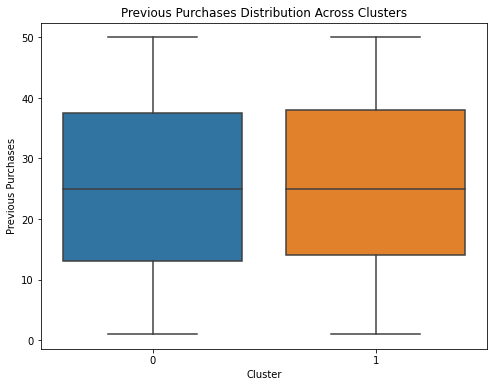

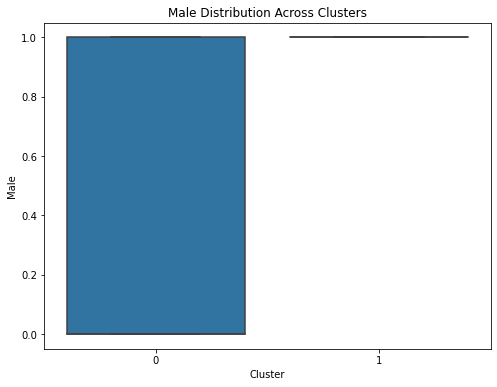

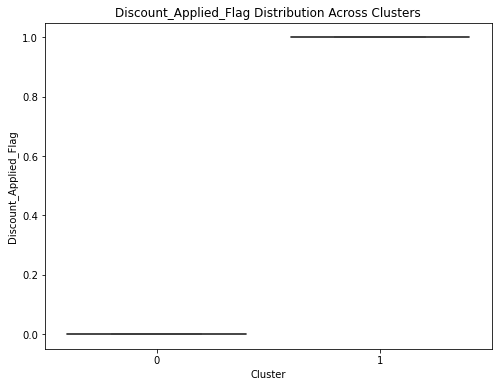

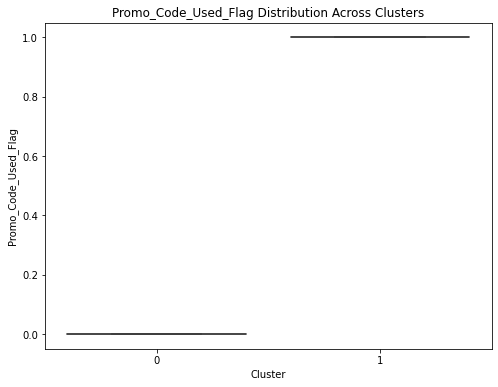

In [47]:
numerical_features = ['Purchase Amount (USD)', 'Review Rating','Subscription Status','Previous Purchases','Male','Discount_Applied_Flag','Promo_Code_Used_Flag']  # Modify this with your numerical features

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=df1)
    plt.title(f'{feature} Distribution Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

# Recommender System

In [48]:
from sklearn.neighbors import NearestNeighbors

In [49]:
df1.head()

,Age,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Previous Purchases,Payment Method,Frequency of Purchases,Discount_Applied_Flag,Promo_Code_Used_Flag,Age_Group,Male,Cluster,GMM_Cluster
0,55,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Express,14,Venmo,Fortnightly,1,1,Middle-aged,1,1,2
1,19,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Express,2,Cash,Fortnightly,1,1,Young,1,1,2
2,50,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,23,Credit Card,Weekly,1,1,Middle-aged,1,1,2
3,21,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,49,PayPal,Weekly,1,1,Young,1,1,2
4,45,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,31,PayPal,Annually,1,1,Middle-aged,1,1,2


In [50]:
df1 = df1.drop('GMM_Cluster',axis=1)

In [51]:
df1.columns

Index(['Age', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Discount_Applied_Flag',
       'Promo_Code_Used_Flag', 'Age_Group', 'Male', 'Cluster'],
      dtype='object')

Data Preperation

In [52]:
user_item_matrix = df1.pivot_table(index=df1.index, columns='Item Purchased', values='Purchase Amount (USD)', fill_value=0)

In [53]:
user_item_matrix

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
0,0,0,53,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,64,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,49,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,0,0,0,0,0,0,0,0,28,...,0,0,0,0,0,0,0,0,0,0
3896,49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3897,0,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3898,0,0,0,0,0,0,0,0,0,0,...,0,0,77,0,0,0,0,0,0,0


## Content Based Filtering

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [55]:
df1.head()

,Age,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Previous Purchases,Payment Method,Frequency of Purchases,Discount_Applied_Flag,Promo_Code_Used_Flag,Age_Group,Male,Cluster
0,55,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Express,14,Venmo,Fortnightly,1,1,Middle-aged,1,1
1,19,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Express,2,Cash,Fortnightly,1,1,Young,1,1
2,50,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,23,Credit Card,Weekly,1,1,Middle-aged,1,1
3,21,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,49,PayPal,Weekly,1,1,Young,1,1
4,45,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,31,PayPal,Annually,1,1,Middle-aged,1,1


In [56]:
df1['User_ID'] = df1.index

In [57]:
def content_based_recommendations(user_id, top_n=5):
    df1['Item_Features'] = df1['Category'] + ' ' + df1['Color'] + ' ' + df1['Size']
    
    tfidf = TfidfVectorizer(stop_words='english')
    item_features_tfidf = tfidf.fit_transform(df1['Item_Features'])
    
    item_similarity = linear_kernel(item_features_tfidf, item_features_tfidf)
    
    seen_items = set(df1[df1['User_ID'] == user_id]['Item Purchased'])
    recommendations = []
    
    item_similarities = list(enumerate(item_similarity[df1[df1['User_ID'] == user_id].index.values[0]]))
    item_similarities = sorted(item_similarities, key=lambda x: x[1], reverse=True)
    
    for item, similarity in item_similarities:
        if len(recommendations) >= top_n:
            break
        if df1.iloc[item]['Item Purchased'] not in seen_items:
            recommendations.append(df1.iloc[item]['Item Purchased'])
    
    return recommendations

In [58]:
content_based_recommendations(5)

['Shoes', 'Boots', 'Shoes', 'Shoes', 'Boots']

In [59]:
content_based_recommendations(897)

['Blouse', 'Skirt', 'Sweater', 'Sweater', 'Sweater']

# Collaborative Filtering 

In [60]:
df1['User_ID'] = df1.index

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

In [62]:
user_similarity = cosine_similarity(user_item_matrix)

In [63]:
def collaborative_recommendations(user_id, top_n=5):
    user_similarities = user_similarity[user_id]  # Assuming user_id starts from 1
    similar_users = sorted(list(enumerate(user_similarities)), key=lambda x: x[1], reverse=True)

    seen_items = set(df1[df1['User_ID'] == user_id]['Item Purchased'])
    recommendations = []
    
    for user, similarity in similar_users:
        if len(recommendations) >= top_n:
            break
        if user != user_id - 1:  # Exclude the target user
            similar_user_items = df1[df1['User_ID'] == user + 1]['Item Purchased']
            for item in similar_user_items:
                if item not in seen_items:
                    recommendations.append(item)
                    if len(recommendations) >= top_n:
                        break
    
    return recommendations

In [64]:
collaborative_recommendations(5)

['Shirt', 'Sunglasses', 'Gloves', 'Socks', 'Skirt']

In [65]:
collaborative_recommendations(897)

['Shorts', 'Jewelry', 'Hoodie', 'Gloves', 'Hoodie']

# Hybrid Recommender System 

In [66]:
def hybrid_recommendations(user_id, top_n=5):
    content_based_rec = content_based_recommendations(user_id, top_n)
    
    collaborative_rec = collaborative_recommendations(user_id, top_n)
    
    hybrid_rec = list(set(content_based_rec + collaborative_rec))[:top_n]
    return hybrid_rec

In [67]:
hybrid_recommendations(5)

['Socks', 'Sunglasses', 'Shirt', 'Boots', 'Shoes']

In [68]:
hybrid_recommendations(897)

['Blouse', 'Hoodie', 'Sweater', 'Gloves', 'Shorts']

## Integration with Computer Vision for In-Store personalized Recommendations

In [69]:
def integrate_recommender_with_vision(customer_data, captured_data):
    # Merge customer behavior data with captured visual data
    merged_data = merge_data(customer_data, captured_data)
    
    # Feed merged data into the recommender system
    personalized_recommendations = hybrid_recommendations(merged_data)
    
    return personalized_recommendations

# Display personalized recommendations to customers in-store
def display_recommendations(personalized_recommendations):
    # Implement code to display recommendations through in-store screens or mobile apps
    pass

The integration of the computer vision technology with the co-existing recommendation system requires a higher level of detailed work to be done by a team of certified professionals. With this implementation, we can see a rise of the **Super-Smart Stores** which would be enabled with Augmented Reality to help customers get the best of their needs.

Nowadays with the rise of AI and Cloud services such as AWS, Microsoft Azure etc., we can use these services to directly integrate the Computer Vision technology and hence reduce the manual and computation labour and time.